## PART 1

In [23]:
#cargando paquetes:
using Pkg
using CSV
using Distributions
using DataFrames
using Dates
using Plots
using Random
using LinearAlgebra
using LaTeXStrings
using Lasso
using Statistics
using GLMNet
using MLJ
using StatsBase
using CSV
using StatsModels
using GLM
using CategoricalArrays


In [80]:
#1.1
#loading the data 
df = CSV.read("../data/experimental/experimental_control.csv", DataFrame);

#data = select(df_csv, Not([:row]))
first(df, 5)



Row,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,37,11,1,0,1,1,0.0,0.0,9930.05
2,1,22,9,0,1,0,1,0.0,0.0,3595.89
3,1,30,12,1,0,0,0,0.0,0.0,24909.4
4,1,27,11,1,0,0,1,0.0,0.0,7506.15
5,1,33,8,1,0,0,1,0.0,0.0,289.79


In [85]:
# 1.2

# Fit the linear model
model = lm(@formula(re78 ~ treat), df)

# Display the summary of the model
model

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

re78 ~ 1 + treat

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  4554.8      408.046  11.16    <1e-24   3752.85     5356.75
treat        1794.34     632.853   2.84    0.0048    550.574    3038.11
───────────────────────────────────────────────────────────────────────

In [59]:
#1.3

using MLJ

y, X = unpack(df, ==(:re78), !=(:re78))


#coerce!(X, Textual => Multiclass)

coerce!(X, Count => MLJ.Continuous)


Row,treat,age,educ,black,hisp,marr,nodegree,re74,re75
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0
2,1,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0
5,1,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0
6,1,22.0,9.0,1.0,0.0,0.0,1.0,0.0,0.0
7,1,23.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1,32.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0
9,1,22.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0


In [60]:
D, X = unpack(X, ==(:treat), !=(:treat))

(["1", "1", "1", "1", "1", "1", "1", "1", "1", "1"  …  "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"], 445×8 DataFrame
 Row │ age      educ     black    hisp     marr     nodegree  re74       re75  ⋯
     │ Float64  Float64  Float64  Float64  Float64  Float64   Float64    Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    37.0     11.0      1.0      0.0      1.0       1.0      0.0        0 ⋯
   2 │    22.0      9.0      0.0      1.0      0.0       1.0      0.0        0
   3 │    30.0     12.0      1.0      0.0      0.0       0.0      0.0        0
   4 │    27.0     11.0      1.0      0.0      0.0       1.0      0.0        0
   5 │    33.0      8.0      1.0      0.0      0.0       1.0      0.0        0 ⋯
   6 │    22.0      9.0      1.0      0.0      0.0       1.0      0.0        0
   7 │    23.0     12.0      1.0      0.0      0.0       0.0      0.0        0
   8 │    32.0     11.0      1.0      0.0      0.0       1.0      0.0        0

In [67]:
#volvemos a D categorica para hacer el Logit 
Pkg.add("CategoricalArrays")
using CategoricalArrays
D = categorical(D)

   Resolving package versions...
  No Changes to `C:\Users\abrah\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\abrah\.julia\environments\v1.10\Manifest.toml`


445-element CategoricalArray{String,1,UInt32}:
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 ⋮
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"

In [54]:
Pkg.add("MLJScikitLearnInterface")


   Resolving package versions...
  No Changes to `C:\Users\abrah\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\abrah\.julia\environments\v1.10\Manifest.toml`


In [68]:
using MLJModels


LogisticClassifier = @load LogisticClassifier pkg = MLJScikitLearnInterface

log_model = LogisticClassifier()

log_model_machine = machine(log_model, X, D)

fit!(log_model_machine)

import MLJScikitLearnInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\abrah\.julia\packages\MLJModels\8W54X\src\loading.jl:159
┌ Info: Training machine(LogisticClassifier(penalty = l2, …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
C:\Users\abrah\.julia\environments\v1.10\.CondaPkg\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\abrah\.julia\environments\v1.10\.CondaPkg\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative sol

trained Machine; caches model-specific representations of data
  model: LogisticClassifier(penalty = l2, …)
  args: 
    1:	Source @496 ⏎ Table{AbstractVector{ScientificTypesBase.Continuous}}
    2:	Source @094 ⏎ AbstractVector{Multiclass{2}}


In [75]:
pscore = pdf.(MLJ.predict(log_model_machine, X), "1")


445-element Vector{Float64}:
 0.4400555177896746
 0.29803274516265493
 0.5620006287438839
 0.3819483392032034
 0.40421259113216945
 0.3683140286608212
 0.5388321083345528
 0.39785794213208464
 0.5311663368990794
 0.5936417491690992
 ⋮
 0.4378323698570778
 0.5647320724243795
 0.30687518244525414
 0.5375795560539873
 0.3039208025965959
 0.45203196642083604
 0.4927749805149839
 0.4675139959744974
 0.5421455895694134

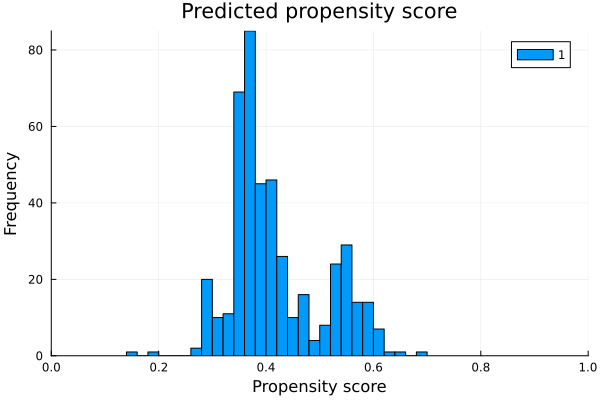

In [77]:
using Plots

histogram(pscore, bins=30, title="Predicted propensity score", label="1",
    xlabel="Propensity score", ylabel="Frequency", xlims=(0, 1))

In [81]:
y_star = df.re78 ./ (df.treat .* pscore .- (1 .- df.treat) .* (1 .- pscore))

445-element Vector{Float64}:
  22565.438898061006
  12065.432746345532
  44322.81379190731
  19652.25457388452
    716.9244423161807
  11013.682838076167
      0.0
  21294.430262529062
   4074.094727632203
  20918.45853139737
      ⋮
     -0.0
     -0.0
 -10236.136035216505
 -26727.42897101548
     -0.0
     -0.0
 -33319.13870969697
 -13791.843938936228
 -11900.727954385557

In [82]:
mean(y_star)

1505.9633514299783

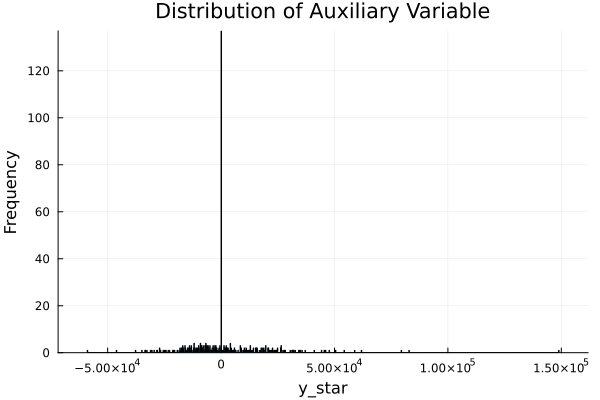

In [86]:
histogram(y_star, bins=1000, title="Distribution of Auxiliary Variable", label=false,
    xlabel="y_star", ylabel="Frequency")

In [88]:
DecisionTreeRegressor = (@load DecisionTreeRegressor pkg = DecisionTree verbosity = 0)
tree_model = DecisionTreeRegressor(max_depth=2)
tree_machine = machine(tree_model, X, y_star)
fit!(tree_machine);

┌ Info: Training machine(DecisionTreeRegressor(max_depth = 2, …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499


In [89]:
fitted_params(tree_machine)[1]

educ < 13.5
├─ re74 < 2653.0
│  ├─ 1923.669672860199 (0/353)
│  └─ -2110.9546608424857 (0/83)
└─ 18478.6148574018 (0/9)


In [91]:
#1.4

RandomForestRegressor = @load RandomForestRegressor pkg = DecisionTree verbosity = 0
forest_model = RandomForestRegressor(n_trees=100)
forest_machine = machine(forest_model, X, y_star)
fit!(forest_machine);

┌ Info: Training machine(RandomForestRegressor(max_depth = -1, …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499


In [92]:
feature_importances(forest_machine)

8-element Vector{Pair{Symbol, Float64}}:
      :age => 0.3415415090278775
     :re75 => 0.2369059125085428
     :educ => 0.15204188361628096
     :re74 => 0.14307796174958862
     :marr => 0.04109226552227423
    :black => 0.03609876040386251
     :hisp => 0.026800550215921416
 :nodegree => 0.022441156955652124

In [93]:
#1.5

df[:, "effect"] = 7 * exp.(-(df.age .- 18) .^ 2 ./ 100) + 3 * (df.re75 .- 20) - 2 * (df.educ .-18) + (df.re74 .-100) .- 2.5;
df[df[:, "effect"].<0, "effect"] .= 0;

In [95]:

df.age_bins = round.(df.age .* 2) ./ 2
effect_bins = combine(groupby(df, :age_bins), :effect => mean => :mean_effect)

Row,age_bins,mean_effect
,Float64,Float64
1,17.0,2062.89
2,18.0,1249.67
3,19.0,5042.85
4,20.0,6480.02
5,21.0,13985.4
6,22.0,11368.9
7,23.0,4843.62
8,24.0,3859.74
9,25.0,6467.08


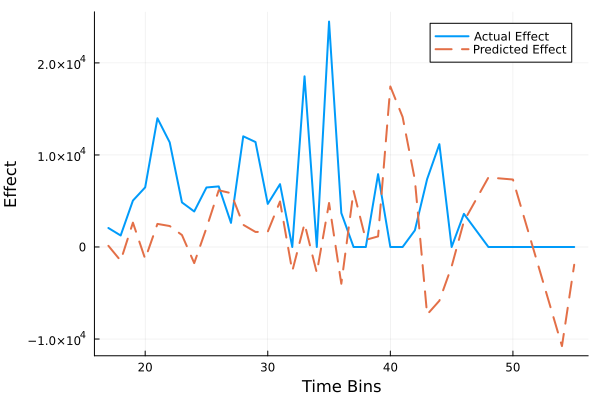

In [97]:
predicted = MLJ.predict(forest_machine, X);
df.predicted_effect = predicted
predicted_effect_bins = combine(groupby(df, :age_bins), :predicted_effect => mean => :mean_predicted_effect);
df.age_bins = floor.(df.age .* 2) ./ 2

effect_bins = combine(groupby(df, :age_bins), :effect => mean => :mean_effect)
sort!(effect_bins, :age_bins)

df.predicted_effect = predicted

predicted_effect_bins = combine(groupby(df, :age_bins), :predicted_effect => mean => :mean_predicted_effect)
sort!(predicted_effect_bins, :age_bins)

plot(effect_bins.age_bins, effect_bins.mean_effect, label="Actual Effect", xlabel="Time Bins", ylabel="Effect", lw=2)
plot!(predicted_effect_bins.age_bins, predicted_effect_bins.mean_predicted_effect, label="Predicted Effect", lw=2, linestyle=:dash)

## PART 2

In [2]:
#loading the data 
df = CSV.read("../data/observational/biased_control.csv", DataFrame);

first(df, 5)

Row,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78,agesq,agecube,educsq,u74,u75,interaction1,re74sq,re75sq
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,0,45,11,0,0,1,1,21.5167,25.2436,25.5647,2025,91125,121,0,0,236.683,462.967,637.237
2,0,21,14,0,0,0,0,3.17597,5.85256,13.4961,441,9261,196,0,0,44.4636,10.0868,34.2525
3,0,38,12,0,0,1,0,23.039,25.1308,25.5647,1444,54872,144,0,0,276.468,530.796,631.555
4,0,48,6,0,0,1,1,24.9944,25.2436,25.5647,2304,110592,36,0,0,149.966,624.718,637.237
5,0,18,8,0,0,1,1,1.6693,10.7276,9.86087,324,5832,64,0,0,13.3544,2.78655,115.082


In [4]:
df_treat_1 = df[df.treat.==1, :]
df_treat_0 = df[df.treat.==0, :]


Row,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78,agesq,agecube,educsq,u74,u75,interaction1,re74sq,re75sq
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,0,45,11,0,0,1,1,21.5167,25.2436,25.5647,2025,91125,121,0,0,236.683,462.967,637.237
2,0,21,14,0,0,0,0,3.17597,5.85256,13.4961,441,9261,196,0,0,44.4636,10.0868,34.2525
3,0,38,12,0,0,1,0,23.039,25.1308,25.5647,1444,54872,144,0,0,276.468,530.796,631.555
4,0,48,6,0,0,1,1,24.9944,25.2436,25.5647,2304,110592,36,0,0,149.966,624.718,637.237
5,0,18,8,0,0,1,1,1.6693,10.7276,9.86087,324,5832,64,0,0,13.3544,2.78655,115.082
6,0,22,11,0,0,1,1,16.3658,18.4493,25.5647,484,10648,121,0,0,180.023,267.838,340.376
7,0,48,10,0,0,1,1,16.8046,16.3546,18.0593,2304,110592,100,0,0,168.046,282.396,267.473
8,0,18,11,0,0,0,1,1.14421,3.62003,15.7393,324,5832,121,0,0,12.5863,1.30922,13.1046
9,0,48,9,0,0,1,1,25.8623,25.2436,25.5647,2304,110592,81,0,0,232.761,668.86,637.237


In [5]:
describe(df_treat_1[!, 2:4])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,age,25.8162,17,25.0,48,0,Int64
2,educ,10.3459,4,11.0,16,0,Int64
3,black,0.843243,0,1.0,1,0,Int64


In [6]:
describe(df_treat_0[!, 2:4])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,age,33.2252,16,31.0,55,0,Int64
2,educ,12.0275,0,12.0,18,0,Int64
3,black,0.0735368,0,0.0,1,0,Int64


In [ ]:
#al parecer el grupo de tratamiento tiene personas más jovenes, con menor educación pero más blancas en comparación al grupo de control

In [ ]:
# 2.3
y = df[!, 11]
# y= reshape(y, (length(y),1))
d = df[!, 3]
# d= reshape(d, (length(y),1))
x = df[!, 4:end];
# x = Matrix(x);


In [15]:
y = df[!, 10]

d = df[!, 1]

x = df[:, Not([1, 10])]

scitype(x)



Table{Union{AbstractVector{ScientificTypesBase.Continuous}, AbstractVector{Count}}}

In [33]:
Pkg.add("FixedEffectModels")
using FixedEffectModels

   Resolving package versions...
   Installed GroupedArrays ───── v0.3.3
   Installed FixedEffects ────── v2.4.0
   Installed FixedEffectModels ─ v1.11.0
   Installed Vcov ────────────── v0.8.1
    Updating `C:\Users\abrah\.julia\environments\v1.10\Project.toml`
  [9d5cd8c9] + FixedEffectModels v1.11.0
    Updating `C:\Users\abrah\.julia\environments\v1.10\Manifest.toml`
  [9d5cd8c9] + FixedEffectModels v1.11.0
  [c8885935] + FixedEffects v2.4.0
  [6407cd72] + GroupedArrays v0.3.3
  [ec2bfdc2] + Vcov v0.8.1
Precompiling project...
  ✓ GroupedArrays
  ✓ Latexify → DataFramesExt
  ✓ FixedEffects
  ✓ Vcov
  ✓ FixedEffectModels
  5 dependencies successfully precompiled in 64 seconds. 366 already precompiled.


In [ ]:
coerce!(x, Count => MLJ.Continuous);

In [36]:
# NAIVE OLS

println("\n length of y is \n", size(y, 1))
println("\n num features x is \n", size(x, 2))

# Naive OLS
print("\n Naive OLS that uses all features w/o cross-fitting \n")
fm = term(:re78) ~ term(:treat) + sum(term.(Symbol.(names(df[Not([1, 10]), :]))));
lres = reg(df, fm);
first(DataFrame(GLM.coeftable(lres)))


 length of y is 
16177

 num features x is 
16

 Naive OLS that uses all features w/o cross-fitting 


Row,Name,Estimate,Std. Error,t-stat,Pr(>|t|),Lower 95%,Upper 95%
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,treat,-8.9366e-14,1.1747e-14,-7.60755,2.9469e-14,-1.12392e-13,-6.63406e-14


In [37]:
function training_sample_append(cv_split, test_sample_index)
    training_indices = []
    for vector in cv_split[Not(test_sample_index)]
        training_indices = [training_indices; vector]
    end
    return training_indices, cv_split[test_sample_index]
end

function dml(x, d, y, dreg, yreg, nfold)
    n = length(y)
    cv = [partition(eachindex(y), fill(1 / nfold, nfold - 1)..., shuffle=true, rng=1234)...]
    machine_y = machine(yreg, x, y, scitype_check_level=0)
    machine_d = machine(dreg, x, d, scitype_check_level=0)
    y_hat = zeros(n)
    d_hat = zeros(n)

    for fold in 1:nfold
        training_fold, test_fold = training_sample_append(cv, fold)
        y_hat[test_fold] = MLJ.predict(MLJ.fit!(machine_y, rows=training_fold), x[test_fold, :])
        d_hat[test_fold] = MLJ.predict(MLJ.fit!(machine_d, rows=training_fold), x[test_fold, :])
    end

    resy = y .- y_hat
    resd = reshape(d .- d_hat, (n, 1))
    estimate = lm(resd, resy)
    coef_est = GLM.coef(estimate)[1]
    se = GLM.coeftable(estimate).cols[2][1]
    println(" coef (se) = ", coef_est, "(", se, ")")
    return coef_est, se, resy, resd
end

function summarize(point, stderr, resy, resd, name)
    return DataFrame(
        model=[name],
        estimate=[point], stderr=[stderr],
        rmse_y=[sqrt(mean(resy .^ 2))],
        rmse_d=[sqrt(mean(resd .^ 2))]
    )
end

summarize (generic function with 1 method)

In [38]:
LinearRegressor = @load LinearRegressor pkg = MLJScikitLearnInterface verbosity = 0
dreg = Standardizer() |> LinearRegressor()
yreg = Standardizer() |> LinearRegressor()
result_ols = dml(x, d, y, dreg, yreg, 10);
table_ols = summarize(result_ols..., "OLS")

LassoCVRegressor = @load LassoCVRegressor pkg = MLJScikitLearnInterface verbosity = 0
dreg = Standardizer() |> LassoCVRegressor(max_iter=200000)
yreg = Standardizer() |> LassoCVRegressor(max_iter=200000)
results_lasso = dml(x, d, y, dreg, yreg, 10);
table_lasso = summarize(results_lasso..., "LassoCV")

RandomForestRegressor = @load RandomForestRegressor pkg = MLJScikitLearnInterface verbosity = 0
dreg = RandomForestRegressor()
yreg = RandomForestRegressor()
results_rf = dml(x, d, y, dreg, yreg, 10);
table_rf = summarize(results_rf..., "RF");

dreg = Standardizer() |> LassoCVRegressor(max_iter=200000)
results_mix = dml(x, d, y, dreg, yreg, 10)
table_mix = summarize(results_mix..., "RF/LassoCV");

┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:standardizer, …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:linear_regressor, …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:standardizer, …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:linear_regressor, …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\abrah\.ju

 coef (se) = 1.5709386603565219(0.5566576621515649)


┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:standardizer, …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:linear_regressor, …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:standardizer, …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:lasso_cv_regressor, …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\abrah\.

 coef (se) = 1.4553455503963653(0.5561085672312803)


┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C

 coef (se) = 1.385465690081532(0.6423819604848331)


┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:standardizer, …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:lasso_cv_regressor, …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\abrah\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:standardizer, …).
└ @ MLJBase C:\Users\abrah\.julia\

 coef (se) = 0.8821852826212164(0.5893870163365987)


In [39]:
Pkg.add("PrettyTables"), using PrettyTables

   Resolving package versions...
    Updating `C:\Users\abrah\.julia\environments\v1.10\Project.toml`
  [08abe8d2] + PrettyTables v2.4.0
  No Changes to `C:\Users\abrah\.julia\environments\v1.10\Manifest.toml`


(nothing, nothing)

In [40]:
pretty_table([table_ols; table_lasso; table_rf; table_mix])

┌────────────┬──────────┬──────────┬─────────┬───────────┐
│      model │ estimate │   stderr │  rmse_y │    rmse_d │
│     String │  Float64 │  Float64 │ Float64 │   Float64 │
├────────────┼──────────┼──────────┼─────────┼───────────┤
│        OLS │  1.57094 │ 0.556658 │  6.9873 │ 0.0986685 │
│    LassoCV │  1.45535 │ 0.556109 │ 6.99038 │ 0.0988129 │
│         RF │  1.38547 │ 0.642382 │ 7.39874 │ 0.0905455 │
│ RF/LassoCV │ 0.882185 │ 0.589387 │ 7.40764 │ 0.0988129 │
└────────────┴──────────┴──────────┴─────────┴───────────┘


In [ ]:
# Recomendaría:
# -estimar d y encontrar sus residuos con RF
# -estimar y y encontrar sus residuos con OLS
#Luego hacer una OLS entre los 2 residuos